# Requisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# An Arm

In [17]:
# Instantiate an arm
from arm import MyBeta
arm = MyBeta(mean=0.2)

# draw three values from that arm
print(arm.draw())
print(arm.draw())
print(arm.draw())

# expected value
print(arm.mean())

# empirical mean
n_samples = 100000
rewards = np.zeros(n_samples)
for i in range(n_samples):
    rewards[i] = arm.draw()

# XXX TO DO XXX       print empirical mean
print("La moyenne est :", rewards.mean())

0.005684562238210831
0.06523997084739189
0.16006172079770148
0.2
La moyenne est : 0.20000049693615815


# Bandit Setting : One Game (Played by a Human)

## Environment

In [18]:
environment = [MyBeta(mean=0.8), MyBeta(mean=0.2), MyBeta(mean=0.4)]

# mean per arm
for i, arm in enumerate(environment):
    print("expected value for arm ", i, ": ", arm.mean(), sep="")

expected value for arm 0: 0.8
expected value for arm 1: 0.2
expected value for arm 2: 0.4


## Game

In [19]:
n_iter = 5

# play a game
for t in range(n_iter):
    print("===")
    print("iteration ", t)
    i_arm = int(input("Which arm do you want to play? "))
    #reward = 0 # XXX TO DO XXX       draw the chosen arm and store the result in reward
    reward = environment[i_arm].draw()
    print("Reward:", reward)    

===
iteration  0


Which arm do you want to play?  2


Reward: 0.0042812286621760325
===
iteration  1


Which arm do you want to play?  1


Reward: 0.16532528736333105
===
iteration  2


Which arm do you want to play?  0


Reward: 0.9996411398527338
===
iteration  3


Which arm do you want to play?  0


Reward: 0.8492510147349912
===
iteration  4


Which arm do you want to play?  1


Reward: 0.15326091411818443


## Cumulative Gain

In [21]:
n_iter = 5

rewards = np.zeros(n_iter)

# play a game
for t in range(n_iter):
    print("===")
    print("iteration ", t)
    i_arm = int(input("Which arm do you want to play? "))
    reward = environment[i_arm].draw()
    # XXX TO DO XXX       store the reward in `rewards`
    rewards[t] = reward
    print("Reward:", reward)

    
# XXX TO DO XXX       print total reward at time `n_iter`
print('------------------------------------')
print('La sommes des récompenses est : ', rewards.sum())
    
# XXX TO DO XXX       print total reward at each timestep
print('Les récompenses cumulées au cours du temps : ', rewards.cumsum())

===
iteration  0


Which arm do you want to play?  2


Reward: 0.8900284473554074
===
iteration  1


Which arm do you want to play?  1


Reward: 0.03055868967626484
===
iteration  2


Which arm do you want to play?  0


Reward: 0.6172044444597364
===
iteration  3


Which arm do you want to play?  0


Reward: 0.31346349623358294
===
iteration  4


Which arm do you want to play?  1


Reward: 0.5881316773441264
------------------------------------
La sommes des récompenses est :  2.439386755069118
Les récompenses cumulées au cours du temps :  [0.89002845 0.92058714 1.53779158 1.85125508 2.43938676]


# Cumulative Regret

In [25]:
n_iter = 5

expected_rewards = np.zeros(n_iter)

best_expected_rewards = np.zeros(n_iter)


# play a game
for t in range(n_iter):
    print("===")
    print("iteration ", t)
    i_arm = int(input("Which arm do you want to play? "))
    reward = environment[i_arm].draw()
    print("Reward:", reward)
    # to compute the regret
    expected_rewards[t] = environment[i_arm].mean()
    best_expected_rewards[t] = max([arm.mean() for arm in environment])

    
# XXX TO DO XXX       print instantaneous regret
print("Le regret à chaque pas de temps :")
print(best_expected_rewards - expected_rewards)

    
# XXX TO DO XXX       print cumulative regret
print('------------------------------')
print("Le regret cumulé à est :")
print((best_expected_rewards - expected_rewards).cumsum())

===
iteration  0


Which arm do you want to play?  2


Reward: 0.0048024719944152385
===
iteration  1


Which arm do you want to play?  0


Reward: 0.9999999960181953
===
iteration  2


Which arm do you want to play?  0


Reward: 0.9940934176632389
===
iteration  3


Which arm do you want to play?  1


Reward: 1.2066257531319634e-06
===
iteration  4


Which arm do you want to play?  0


Reward: 0.999523567860361
Le regret à chaque pas de temps :
[0.4 0.  0.  0.6 0. ]
------------------------------
Le regret cumulé à est :
[0.4 0.4 0.4 1.  1. ]


## Let's Plot!

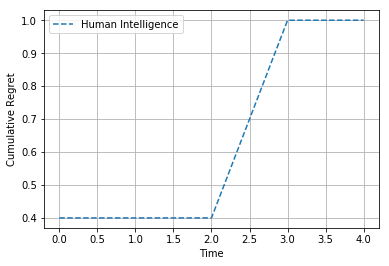

In [26]:
plt.plot((best_expected_rewards - expected_rewards).cumsum(), "--", label='Human Intelligence')
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()

# AI Player

## Choose an Arm

In [27]:
from player import EpsilonNGreedy

player = EpsilonNGreedy(nb_arms=3, c=5)

for _ in range(10):
    print("Chosen arm:", player.choose_next_arm())
#ici le choix est totalement aléatoire, l'algorithme ne s'améliore pas au fil du temps.

Chosen arm: 1
Chosen arm: 1
Chosen arm: 1
Chosen arm: 1
Chosen arm: 0
Chosen arm: 1
Chosen arm: 0
Chosen arm: 1
Chosen arm: 0
Chosen arm: 2


## Learn

In [ ]:
n_rep = 10

#ici, on impose à l'algo de jouer le bras qu'on veut !!
# play arm 2 `n_rep` times
i_arm = 2
for _ in range(n_rep):
    reward = environment[i_arm].draw()
    player.update(i_arm, reward)


# XXX TO DO XXX       play arm 0 and arm 1 `n_rep` times



# What are the chosen arms now ?
for _ in range(30):
    print("Chosen arm:", player.choose_next_arm())

# Let's Play!

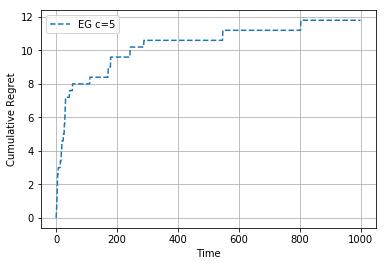

In [30]:
n_iter = 1000

"""!!! Do not cheat: restart the player !!!"""
player.restart()


expected_rewards = np.zeros(n_iter)
best_expected_rewards = np.zeros(n_iter)


# play a game
for t in range(n_iter):
    #i_arm = 0 # XXX TO DO XXX       let the artificial player choose the arm
    i_arm = player.choose_next_arm()
    reward = environment[i_arm].draw()
    player.update(i_arm, reward)
    # XXX TO DO XXX       tel to the artificial player which regret was obtained
    # to compute the regret
    expected_rewards[t] = environment[i_arm].mean()
    best_expected_rewards[t] = max([arm.mean() for arm in environment])


# plot the results    
plt.plot((best_expected_rewards - expected_rewards).cumsum(), "--", label='EG c=5')
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()

# Multiple Games

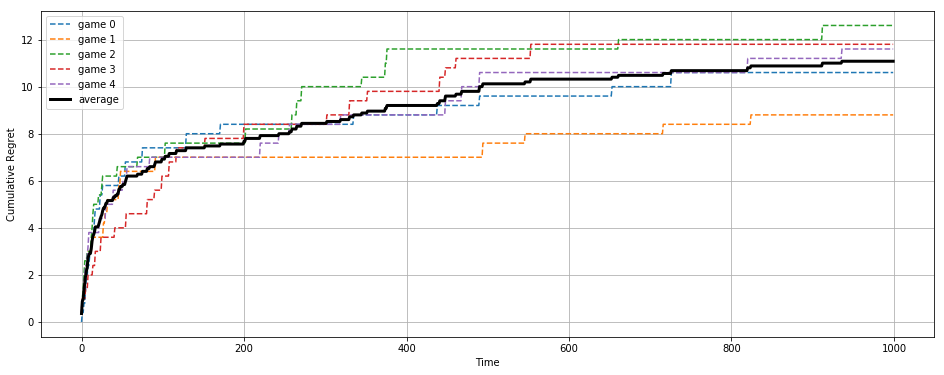

In [34]:
n_iter = 1000
n_games = 5

expected_rewards = np.zeros((n_iter, n_games))
best_expected_rewards = np.zeros((n_iter, n_games))



for i_game in range(n_games):
    """!!! Do not cheat: restart the player !!!"""
    player.restart()

    # play a game
    for t in range(n_iter):
        i_arm = player.choose_next_arm()
        reward = environment[i_arm].draw()
        player.update(i_arm, reward)
        # to compute the regret
        expected_rewards[t, i_game] = environment[i_arm].mean()
        best_expected_rewards[t, i_game] = max([arm.mean() for arm in environment])


# plot the results
plt.figure(figsize=(16,6))
for i_game in range(n_games):
    plt.plot((best_expected_rewards - expected_rewards)[:,i_game].cumsum(), "--", label='game '+str(i_game))
plt.plot((best_expected_rewards - expected_rewards).mean(1).cumsum(), "-", label='average', lw=3, color = 'black')
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()

# Let `exp.py` do the Job 

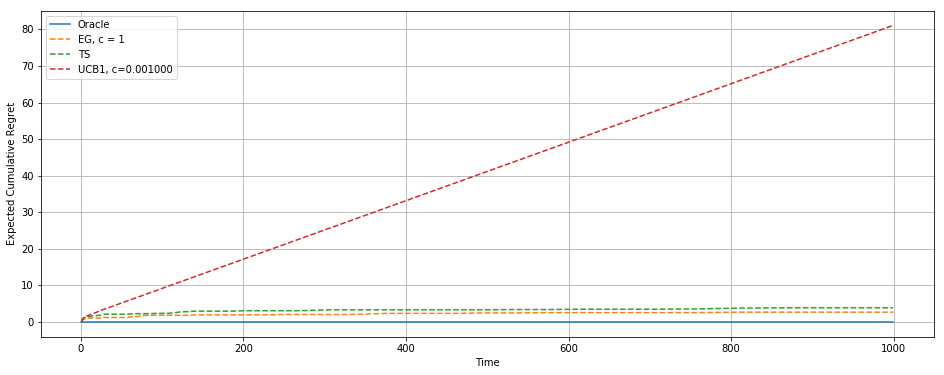

In [143]:
from exp import games, cumulative_regret, cumulative_reward, logarithmic_indices
from random import shuffle
from player import Oracle, EpsilonNGreedy, ThompsonSamplingBernoulli, UCB1

# =============================
# play games
# =============================
environment = [MyBeta(mean=0.8), MyBeta(mean=0.2), MyBeta(mean=0.4)]
shuffle(environment)
n_iter = 1000
n_games = 5

logs_oracle = games(Oracle(np.argmax([a.mean() for a in environment])), environment, n_iter, n_games)
logs_EG1    = games(EpsilonNGreedy(nb_arms=len(environment), c=1), environment, n_iter, n_games)
# XXX TO DO XXX       run also with c=10 and c=100
logs_TS     = games(ThompsonSamplingBernoulli(nb_arms=len(environment), prior_s=0.25, prior_f=0.95), environment, n_iter, n_games)
c_ucb = 0.001
logs_UCB1   = games(UCB1(nb_arms=len(environment), c=c_ucb), environment, n_iter, n_games)



# =============================
# plot cumulative regret
# =============================
plt.figure(figsize=(16,6))
plt.clf()

inds = logarithmic_indices(n_iter, 100) # do not plot each point (too much with long runs)

plt.plot(inds + 1, cumulative_regret(logs_oracle)[inds], label='Oracle')
plt.plot(inds + 1, cumulative_regret(logs_EG1)[inds], "--", label='EG, c = 1')
# XXX TO DO XXX       plot res for c=10 and c=100
plt.plot(inds + 1, cumulative_regret(logs_TS)[inds], "--", label='TS')
plt.plot(inds + 1, cumulative_regret(logs_UCB1)[inds], "--", label='UCB1, c=%f'%c_ucb)
plt.xlabel('Time')
plt.ylabel('Expected Cumulative Regret')
plt.legend()
plt.grid(True)
# plt.loglog()
plt.show()

Remarque : si une courbe est en forme de droite (), alors c'est la preuve qu'elle n'a pas fait assez d'exploration.
Il est mieux d'explorer trop que pas assez

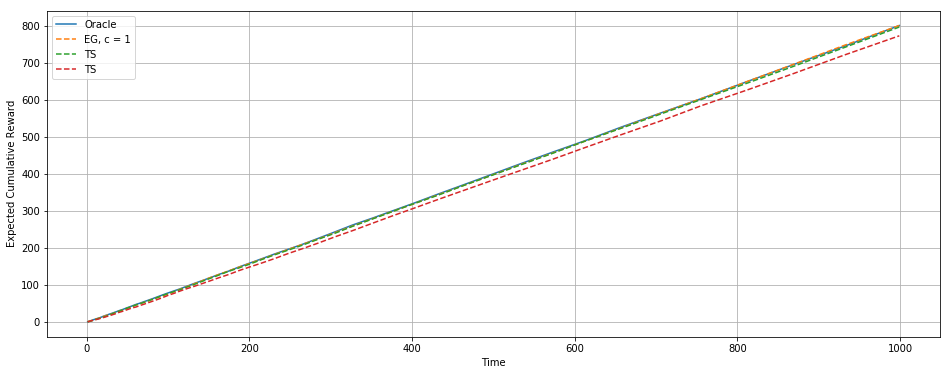

In [78]:
# =============================
# plot cumulative reward
# =============================
plt.figure(figsize=(16,6))
plt.clf()

inds = logarithmic_indices(n_iter, 100) # do not plot each point (too much with long runs)

plt.plot(inds + 1, cumulative_reward(logs_oracle)[inds], label='Oracle')
plt.plot(inds + 1, cumulative_reward(logs_EG1)[inds], "--", label='EG, c = 1')
# XXX TO DO XXX       plot res for c=10 and c=100
plt.plot(inds + 1, cumulative_reward(logs_TS)[inds], "--", label='TS')
plt.plot(inds + 1, cumulative_reward(logs_UCB1)[inds], "--", label='TS')
plt.xlabel('Time')
plt.ylabel('Expected Cumulative Reward')
plt.legend()
plt.grid(True)
# plt.loglog()
plt.show()

In [40]:
1./0.

ZeroDivisionError: float division by zero

In [49]:
np.array([2,3]) + [1,3]

array([3, 6])

[MyBeta(mean=0.44), MyBeta(mean=0.52), MyBeta(mean=0.87), MyBeta(mean=0.69), MyBeta(mean=0.32), MyBeta(mean=0.01), MyBeta(mean=0.24), MyBeta(mean=0.65), MyBeta(mean=0.49), MyBeta(mean=0.68)]

# Compte Rendu

In [9]:
# Packages
from exp import games, cumulative_regret, cumulative_reward, logarithmic_indices
from random import shuffle
from player import Oracle, EpsilonNGreedy, ThompsonSamplingBernoulli, UCB1
from arm import MyBeta
import numpy as np
import matplotlib.pyplot as plt

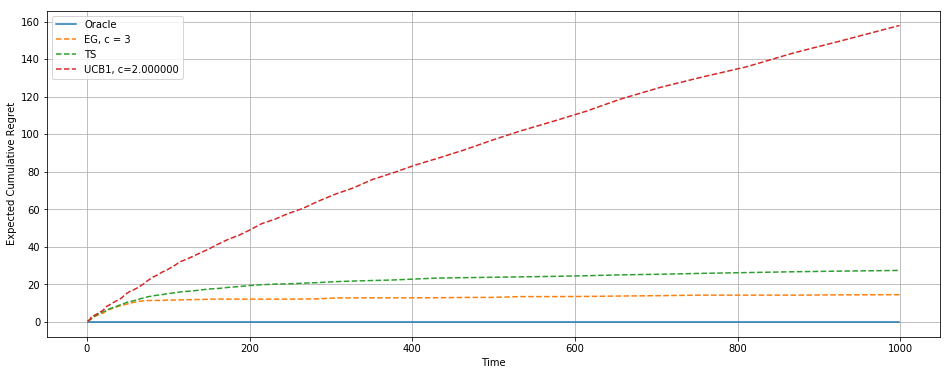

In [191]:
np.random.seed(2)
# =============================
# play games
# =============================
environment = [MyBeta(mean=0.44), MyBeta(mean=0.52), MyBeta(mean=0.87), MyBeta(mean=0.69), MyBeta(mean=0.32), 
               MyBeta(mean=0.01), MyBeta(mean=0.24), MyBeta(mean=0.65), MyBeta(mean=0.49), MyBeta(mean=0.68)]
shuffle(environment)
n_iter = 1000
n_games = 5

logs_oracle = games(Oracle(np.argmax([a.mean() for a in environment])), environment, n_iter, n_games)
c_EG = 3
logs_EG1    = games(EpsilonNGreedy(nb_arms=len(environment), c=c_EG), environment, n_iter, n_games)
# XXX TO DO XXX       run also with c=10 and c=100
logs_TS     = games(ThompsonSamplingBernoulli(nb_arms=len(environment), prior_s=0.25, prior_f=0.95), environment, n_iter, n_games)
c_ucb = 2
logs_UCB1   = games(UCB1(nb_arms=len(environment), c=c_ucb), environment, n_iter, n_games)



# =============================
# plot cumulative regret
# =============================
plt.figure(figsize=(16,6))
plt.clf()

inds = logarithmic_indices(n_iter, 100) # do not plot each point (too much with long runs)

plt.plot(inds + 1, cumulative_regret(logs_oracle)[inds], label='Oracle')
plt.plot(inds + 1, cumulative_regret(logs_EG1)[inds], "--", label='EG, c = %d'%c_EG)
# XXX TO DO XXX       plot res for c=10 and c=100
plt.plot(inds + 1, cumulative_regret(logs_TS)[inds], "--", label='TS')
plt.plot(inds + 1, cumulative_regret(logs_UCB1)[inds], "--", label='UCB1, c=%f'%c_ucb)
plt.xlabel('Time')
plt.ylabel('Expected Cumulative Regret')
plt.legend()
plt.grid(True)
# plt.loglog()
plt.show()

In [69]:
import random

In [82]:
#np.random.seed(2)
#random.random(2)
random.seed(2)
shuffle(environment)
environment[0].mean()

0.65

In [1]:
environment[0].mean()

NameError: name 'environment' is not defined

In [184]:
import random
SEED = 448

myList = environment
random.seed(SEED)
random.shuffle(myList)
myList[0].mean()

0.44